# Mini-Project for Fundamentals of Machine Learning Course
In this study, facial expression recognition was performed on the face images from the Facial Expression Recognition Challenge (FER2013) dataset.

One motivation for representation learning is that learning algorithms can design features more effectively and efficiently than humans can. However, this challenge does not explicitly require entries to use representation learning. The dataset, assembled from the internet, is designed for facial expression classification.

The data consists of grayscale images of faces, each measuring 48x48 pixels. The faces have been automatically aligned to be roughly centered and occupy a similar area within each image. The task is to categorize each face based on the emotion expressed, assigning it to one of seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral). The dataset contains a total of 35,887 examples.

## 1. Prerequisite
This section provides some basic steps for accessing and visualizing the dataset.

In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
def parse_data(data: pd.DataFrame):
    """
    Reads input dataframe then return arrays of images and labels
    """
    image_array = np.zeros(shape=(len(data), 48, 48))
    image_label = np.array(list(map(int, data['emotion'])))

    for i, row in enumerate(data.index):
        image = np.fromstring(data.loc[row, 'pixels'], dtype=int, sep=' ')
        image = np.reshape(image, (48, 48))
        image_array[i] = image

    return image_array, image_label

In [ ]:
def show_img(images: np.ndarray, labels: np.ndarray):
    """
    Visualize images and labels respectively
    """
    _, axarr=plt.subplots(nrows=2, ncols=5, figsize=(18, 9))
    axarr=axarr.flatten()
    for idx, label in enumerate(labels[:10]):
        axarr[idx].imshow(images[idx], cmap='gray')
        axarr[idx].set_xticks([])
        axarr[idx].set_yticks([])
        axarr[idx].set_title("Label:{}".format(label))

In [ ]:
## load dataset here

from google.colab import drive
drive.mount('/content/drive')

DATA_PATH = '/content/drive/My Drive/Mini-Project ML/data/icml_face_data.csv'

df = pd.read_csv(DATA_PATH)
df.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


The ```emotion``` column contains a numeric code ranging from 0 to 6, inclusive, for the emotion expressed by the image. The "pixels" column contains a string surrounded in quotes for each image.

In [ ]:
## parsing data here
images, labels = parse_data(df)

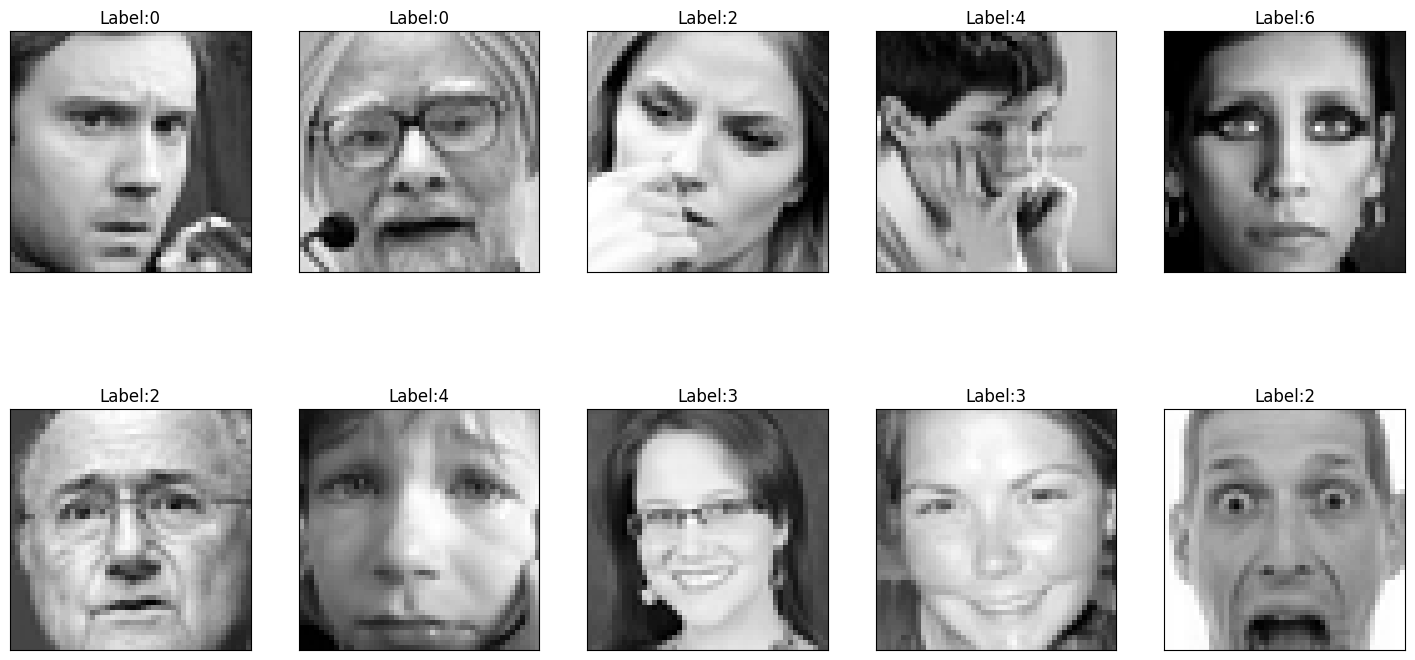

In [ ]:
## showing images here
show_img(images, labels)

## 2. Principle Component Analysis

Unsupervised learning can be further categorized into two main tasks: data transformation and clustering. In this study, we will focus on data transformation using unsupervised learning techniques. These techniques aim to modify the data to make it easier for computers and humans to analyze and understand.

One of the most common applications of unsupervised data transformation is dimensionality reduction. This process reduces the number of features (dimensions) in the data. When the data has a high number of features, it can be computationally expensive and difficult to analyze. Dimensionality reduction techniques help to overcome these challenges.

Principal Component Analysis (PCA) is a popular technique for dimensionality reduction. It transforms the data into a new set of features called principal components (PCs). These PCs are ordered by their importance, capturing the most significant variations in the data. By selecting a subset of the most informative PCs, we can achieve a significant reduction in data size while preserving the essential information for analysis.

Question 1: Can you visualize the data projected onto two principal components? (2 points)

In [ ]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [ ]:
# Reshape images for PCA
image_bw = images.reshape(images.shape[0], -1)
print("Shape of the reshaped image array for PCA:", image_bw.shape)

Shape of the reshaped image array for PCA: (35887, 2304)


In [ ]:
from sklearn.decomposition import PCA, IncrementalPCA
pca = PCA(n_components=2)
pca_result = pca.fit_transform(image_bw)

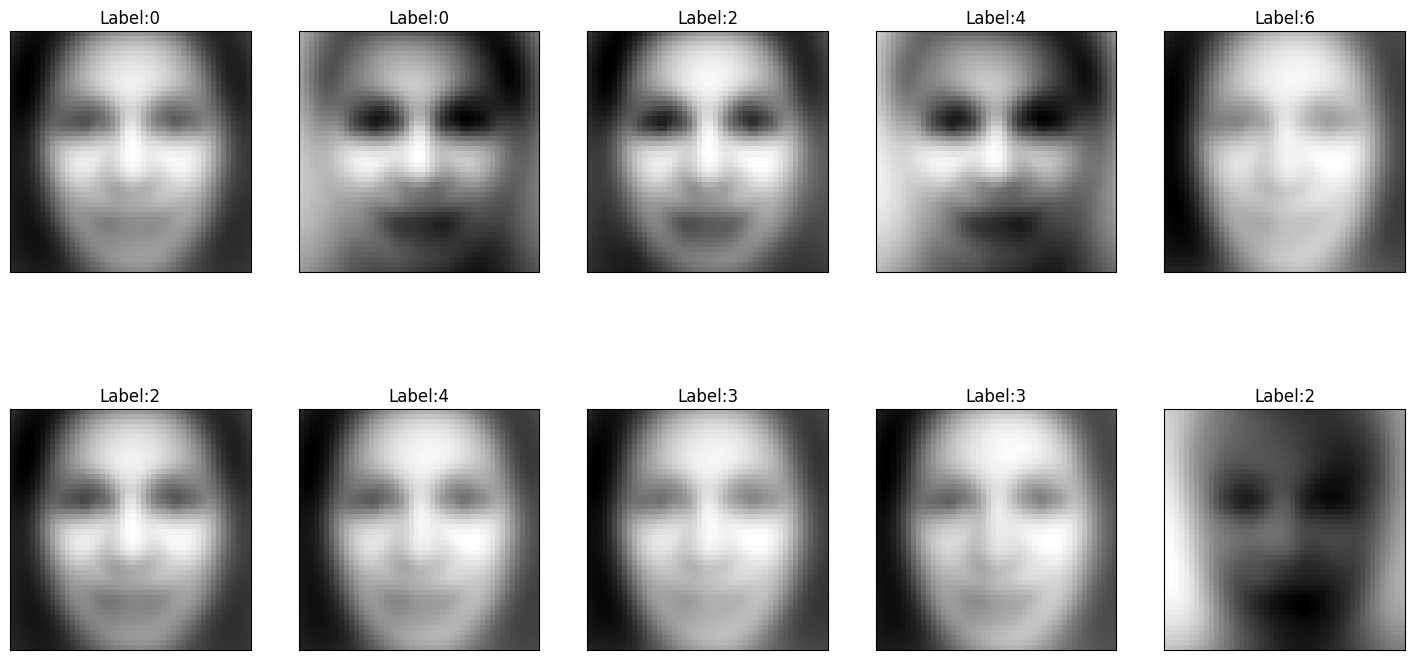

In [ ]:
## transform for visualizing here
pca_inverse = pca.inverse_transform(pca_result)
images_reconstructed = pca_inverse.reshape(images.shape)
show_img(images_reconstructed, labels)

Visualizing the data projected onto two principal components is not effective. Therefore, it is essential to determine the optimal number of principal compenents appropriately.

Question 2: How to determine the optimal number of principal components using ```pca.explained_variance_```? Explain your selection process. (2 points)

In [ ]:
## determine the optimal number of PCs here
## pca.explained_variance_()

In [ ]:
# Normalize the images to range 0.0 to 1.0
images_normalized = images / 255.0

Shape of the image array: (35887, 48, 48)
Max value in the images (after normalization): 1.0
Shape of the reshaped image array for PCA: (35887, 2304)
Number of components explaining 95% variance: 255


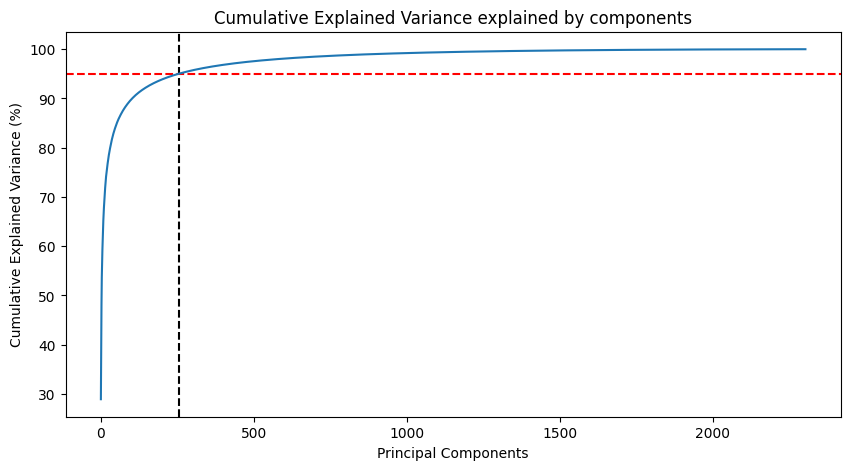

In [ ]:

# Show the new shape of the image array
print("Shape of the image array:", images_normalized.shape)

# Show the max value at any point in the normalized images
print("Max value in the images (after normalization):", images_normalized.max())

# Reshape images for PCA
image_bw = images_normalized.reshape(images_normalized.shape[0], -1)
print("Shape of the reshaped image array for PCA:", image_bw.shape)

# Apply PCA
pca = PCA()
pca.fit(image_bw)

# Getting the cumulative variance
var_cumu = np.cumsum(pca.explained_variance_ratio_) * 100

# How many PCs explain 95% of the variance?
k = np.argmax(var_cumu > 95) + 1
print("Number of components explaining 95% variance: " + str(k))

# Plot cumulative explained variance
plt.figure(figsize=[10, 5])
plt.title('Cumulative Explained Variance explained by components')
plt.ylabel('Cumulative Explained Variance (%)')
plt.xlabel('Principal Components')
plt.axvline(x=k, color="k", linestyle="--")
plt.axhline(y=95, color="r", linestyle="--")
plt.plot(var_cumu)
plt.show()

> From 0 to 500 principal components, there is a sharp rise in explained variance initially, indicating that these components capture a significant amount of the data's variance. The subsequent components only increase the explained variance slightly, making their contribution negligible. Therefore, choosing a threshold of 95% explained variance is reasonable as it captures most of the data's variance while significantly reducing the dimensionality.

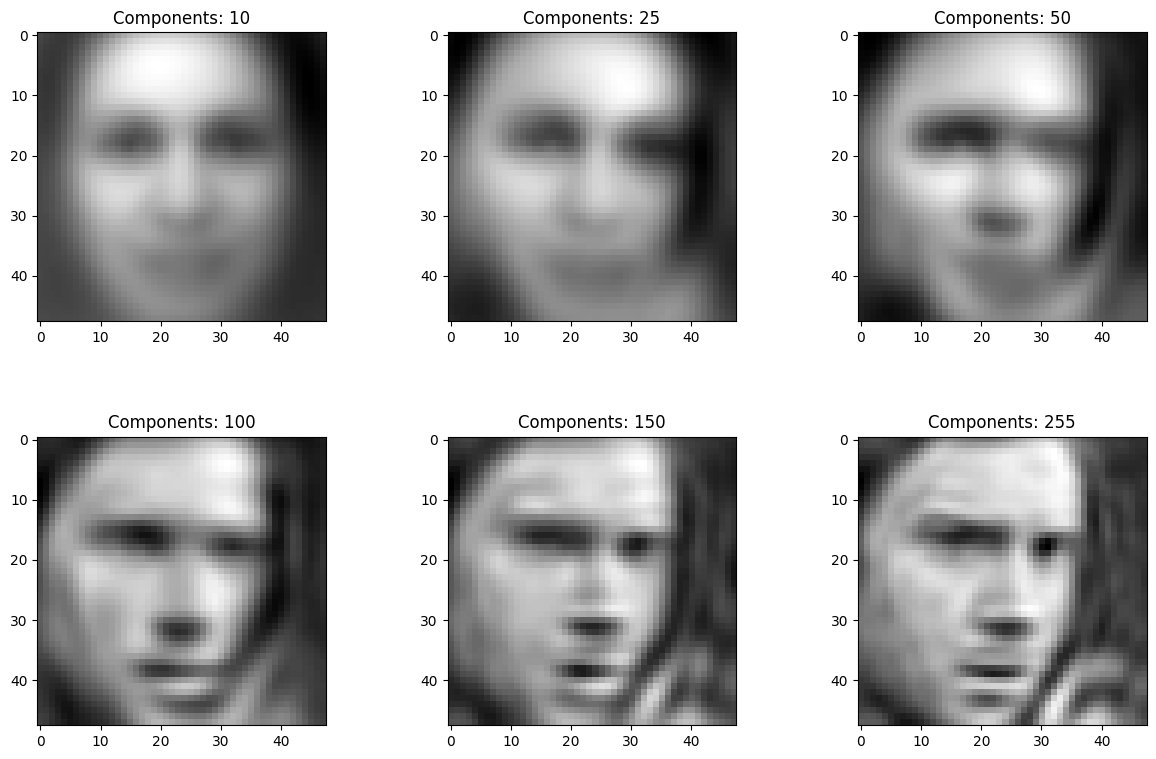

In [ ]:
def plot_at_k(k, idx):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    plt.imshow(image_recon[idx].reshape(48, 48), cmap=plt.cm.gray)  # Reshape and display the reconstructed image

# Values of k to visualize
ks = [10, 25, 50, 100, 150, 255]

# Create a figure and loop over different values of k
plt.figure(figsize=[15, 9])
for i, k_val in enumerate(ks):
    plt.subplot(2, 3, i + 1)
    plot_at_k(k_val, 0)  # Display the first reconstructed image for each value of k
    plt.title("Components: " + str(k_val))

plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust spacing between subplots
plt.show()

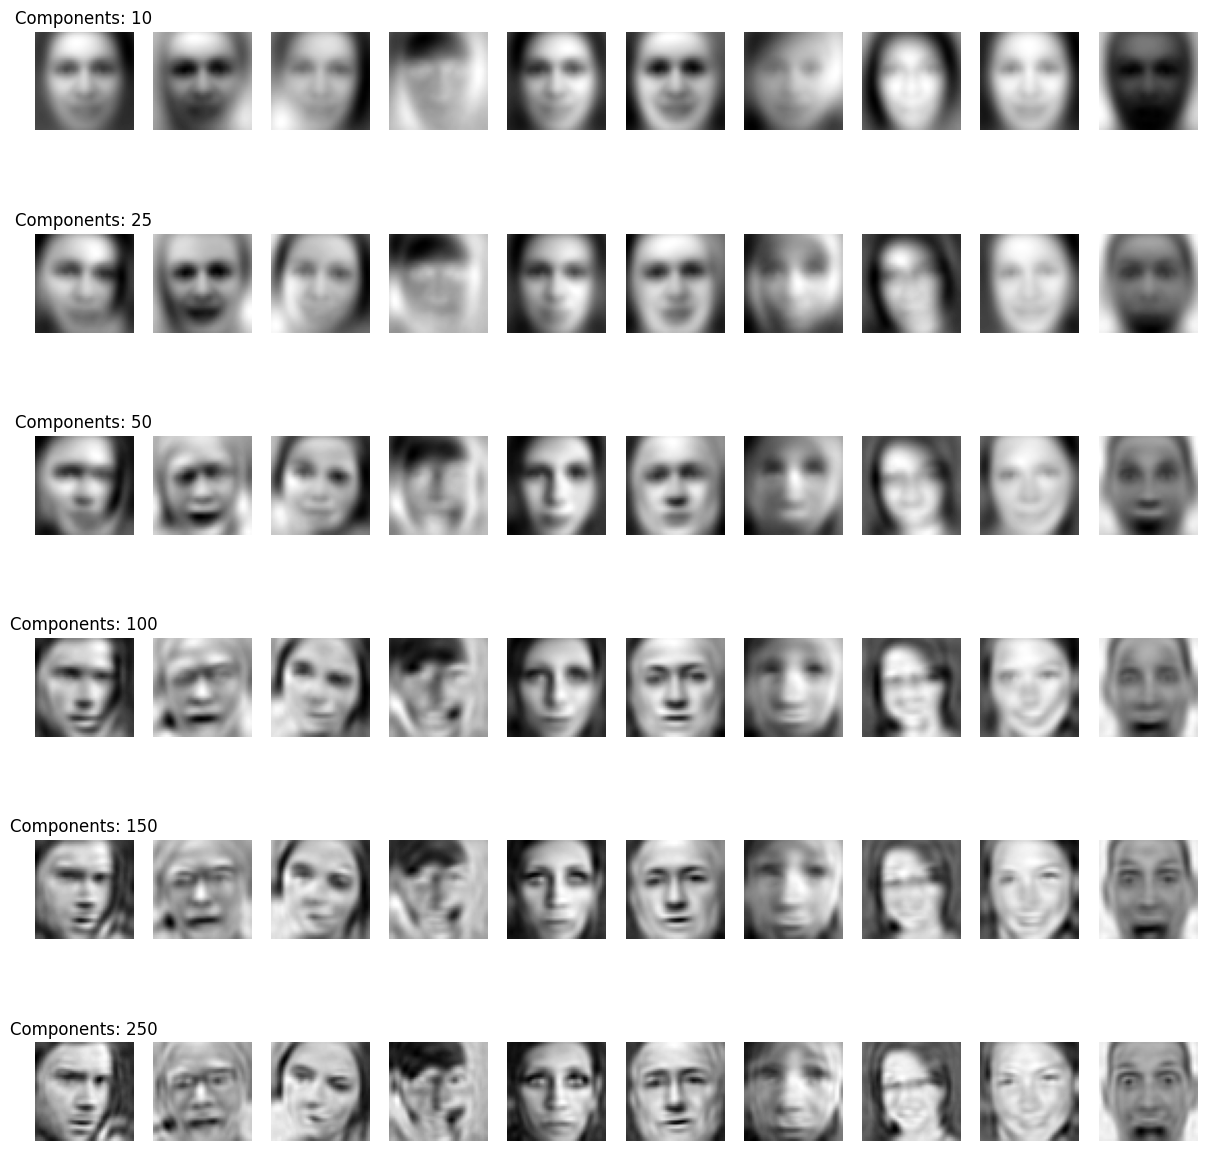

In [ ]:
def plot_at_k(k, num_images=5):
    ipca = IncrementalPCA(n_components=k)
    image_recon = ipca.inverse_transform(ipca.fit_transform(image_bw))
    for i in range(num_images):
        plt.subplot(len(ks), num_images, ks.index(k) * num_images + i + 1)
        plt.imshow(image_recon[i].reshape(48, 48), cmap=plt.cm.gray)
        if i == 0:
            plt.title(f"Components: {k}")
        plt.axis('off')

# Values of k to visualize
ks = [10, 25, 50, 100, 150, 250]

# Create a figure
plt.figure(figsize=[15, 15])

# Loop over different values of k and display multiple images for each k
for k in ks:
    plot_at_k(k, num_images=10)  # Display 10 reconstructed images for each value of k

plt.subplots_adjust(wspace=0.2, hspace=0.4)  # Adjust spacing between subplots
plt.show()

In [ ]:
# Reshape images into 1D arrays
image_flat = images_normalized.reshape(images_normalized.shape[0], -1)

# Check the shape of the transformed data
print("Shape of the transformed data:", image_flat.shape)

Shape of the transformed data: (35887, 2304)


## 3. Image Classification

The classification task will compare the performance using both:

- Original data: The data before applying PCA.
- Transformed data: The data projected onto the optimal number of principal components identified earlier. Utilize the **optimal number of principal components** identified in the previous question.

Compare the performance of **4** different classification algorithms (3 machine learning and 1 MLP models) in both formats above. (4 points)

Perform hyperparameter tuning using ```GridSearchCV``` for each classification method. (1 point)

Inspiration: Draw inspiration from the example provided in the scikit-learn documentation: https://scikit-learn.org/dev/auto_examples/datasets/plot_iris_dataset.html

### 3.1 Prepare

We define some functions and class that are used for our models.


Import some standard libraries

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

from skimage.feature import hog
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn.decomposition import PCA
from sklearn.base import BaseEstimator, TransformerMixin

Functions to save and load a pickle model.

In [ ]:
def save_pickle_model(model, file_path):
    """
    Save the model to the specified file path using pickle.

    Args:
        model (object): The trained model to save.
        file_path (str): The path where the model will be saved.
    """
    try:
        with open(file_path, "wb") as file:
            pickle.dump(model, file)
        print(f"Model saved to {file_path} successfully!")
    except Exception as e:
        print(f"Failed to save model to {file_path}.\nError: {e}")

def load_pickle_model(file_path):
    """
    Load the model from the specified file path using pickle.

    Args:
        file_path (str): The path from where the model will be loaded.

    Returns:
        object: The loaded model, or None if loading fails.
    """
    try:
        with open(file_path, "rb") as file:
            model = pickle.load(file)
        print(f"Model loaded from {file_path} successfully!")
        return model
    except Exception as e:
        print(f"Failed to load model from {file_path}.\nError: {e}")
        return None

Now, we will present an algorithm used for dimensionality reduction. We will use both this one and PCA to increase performance.

**Histograms of Oriented Gradients (HOG)**

---

A popular feature descriptor technique in computer vision and image processing. This descriptor computes the change in pixel values around a point of interest. This change is given by a gradient $\vec{G}$ (change vector) whose magnitude ($m$) and angle ($\theta$) are given by equations 1 and 2:



$$m(x,y) = \sqrt{\vec{G}(x,y)\cdot\vec{G}(x,y)} = \sqrt{\left(G_{x}(x,y)\right)^{2} + \left(G_{y}(x,y)\right)^{2}} \tag{1}$$

$$\theta(x,y) = \tan^{1} \frac{G_y (x,y)}{G_x (x,y) } \tag{2}$$

Example:

![HOG](../materials/hog_alogorithm.png)

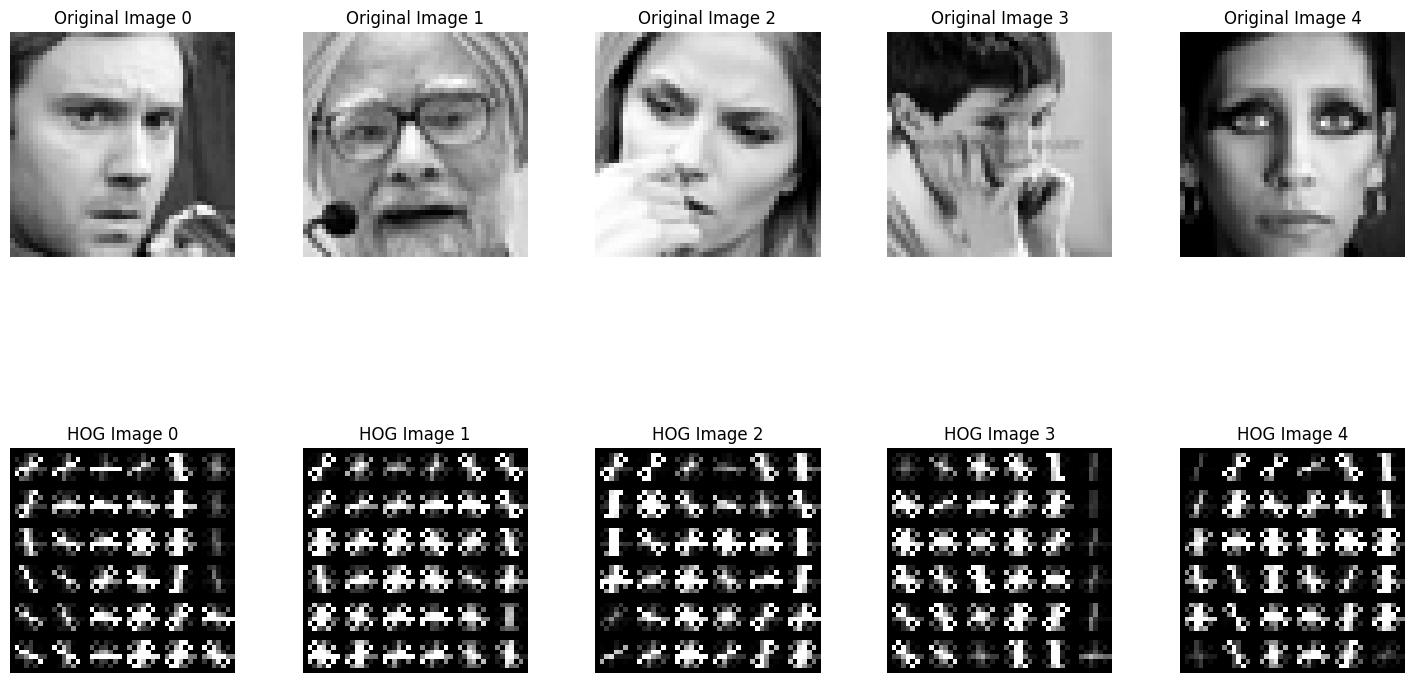

In [ ]:
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 5, figsize=(18, 9))
fig.subplots_adjust(hspace=0.5, wspace=0.3)

for i in range(5):
    # Compute HOG features and the HOG image
    fd, hog_image = hog(images[i], visualize=True)

    # Adjust the HOG image to improve its contrast
    hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10))

    # Plot the original image
    axes[0, i].imshow(images[i], cmap=plt.cm.gray)
    axes[0, i].set_title(f'Original Image {i}')
    axes[0, i].axis('off')

    # Plot the HOG image
    axes[1, i].imshow(hog_image_rescaled, cmap=plt.cm.gray)
    axes[1, i].set_title(f'HOG Image {i}')
    axes[1, i].axis('off')

# displaying plot
plt.show()


We use this class to perform the HOG algorithm in the pipeline.

In [ ]:
class DescriptorHOG(BaseEstimator, TransformerMixin):
    """
    A custom transformer for extracting Histogram of Oriented Gradients (HOG) features from images.

    Attributes:
        hog_orientations (int): Number of orientation bins.
        hog_pixels_per_cell (tuple): Size (in pixels) of a cell.
        hog_cells_per_block (tuple): Number of cells in each block.
        hog_block_norm (str): Block normalization method.
        img_dim (tuple): Dimensions to which each image will be reshaped.

    Methods:
        fit(X, y=None): Fits the transformer (no-op for this transformer).
        feature_hog(arr): Extracts HOG features from a single image.
        transform(X): Applies HOG feature extraction to each image in the input array.
    """

    def __init__(self, hog_orientations=9, hog_pixels_per_cell=(8, 8), hog_cells_per_block=(2, 2), hog_block_norm='L2', img_dim=(48, 48)):
        self.hog_orientations = hog_orientations
        self.hog_pixels_per_cell = hog_pixels_per_cell
        self.hog_cells_per_block = hog_cells_per_block
        self.hog_block_norm = hog_block_norm
        self.img_dim = img_dim

    def fit(self, X, y=None):

        return self

    def feature_hog(self, arr):

        image = arr.reshape(self.img_dim)
        feature_vector = hog(image=image, orientations=self.hog_orientations, pixels_per_cell=self.hog_pixels_per_cell,
                             cells_per_block=self.hog_cells_per_block, block_norm=self.hog_block_norm)
        return feature_vector

    def transform(self, X):

        X_hog = np.apply_along_axis(func1d=self.feature_hog, axis=1, arr=X)
        return X_hog


After that, this is the full pipeline I planned to train our classification models.

**PIPELINE**

| **Steps**                   | **Note**                           |  
|-----------------------------|------------------------------------|
| `DescriptorHOG`             | Feature descriptor                 |
| `PCA`                       | Reduce dimension, keep 90% of data |
| `Standard Scaler`           | Normalize data                     |
| `Classification Algorithms` | Model methods                      |

We will tune the hyperparameters of this pipeline with `GridSearchCV` using a parameter grid based on each model to find the best fine-tuned model.

The classification methods include: `Random Forest`, `Logistic Regression`, `Support Vector Machine (SVM)`, and `multi-layer perceptron (MLP)`.

We will compare each classification method on 2 datasets:
- **Original Data**: the original data (without HOG and PCA)
- **Transformed Data**: full pipeline

> **Note**: In MLP, there are additional models with simple CNNs using Keras and TensorFlow to improve performance (to be discussed later).

Then, we prepare X and y, and split them into training and test subsets.

In [ ]:
X = image_flat
y = labels

## splitting data into train/val/test subsets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"X train size:\t {X_train.shape[0]} x {X_train.shape[1]}")
print(f"X test size:\t {X_test.shape[0]} x {X_test.shape[1]}")
print("y train size:\t",y_train.shape[0])
print("y test size:\t",y_test.shape[0])

X train size:	 28709 x 2304
X test size:	 7178 x 2304
y train size:	 28709
y test size:	 7178


We predefined some paths that are used to save our model.

In [ ]:
LR_PATH = "/content/drive/My Drive/Mini-Project ML/data/lr_md"
LR2_PATH = "/content/drive/My Drive/Mini-Project ML/data/lr_md2"
RF_PATH = "/content/drive/My Drive/Mini-Project ML/data/rf_md"
RF2_PATH = "/content/drive/My Drive/Mini-Project ML/data/rf_md2"
SVM_PATH = "/content/drive/My Drive/Mini-Project ML/data/svm_md"
SVM2_PATH = "/content/drive/My Drive/Mini-Project ML/data/svm_md2"
MLP_PATH = "/content/drive/My Drive/Mini-Project ML/data/mlp_md"
MLP2_PATH = "/content/drive/My Drive/Mini-Project ML/data/mlp_md2"
CNN_MLP_PATH = "/content/drive/My Drive/Mini-Project ML/data/cnn_mlp.keras"

Now, training our models!!

#### **Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression
def make_logistic_regression_model(X, y, dimensionality_reduction=True):
    param_grid = {
        'logisticregression__C': [0.1, 1, 10],
        'logisticregression__max_iter': [100, 200, 300]
    }

    crossVal = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

    if dimensionality_reduction:
        model = make_pipeline(
            DescriptorHOG(),
            PCA(n_components=0.9),
            StandardScaler(),
            LogisticRegression(random_state=42)
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            LogisticRegression(random_state=42)
        )

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=crossVal,
        n_jobs=-1,
        verbose=5
    )

    grid.fit(X, y)
    return grid

##### **Original data**

In [ ]:
logistic_regression_md = make_logistic_regression_model(X_train,y_train, dimensionality_reduction = False)

In [ ]:
save_pickle_model(logistic_regression_md,LR_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/lr_md successfully!


In [ ]:
logistic_regression_md.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=10, random_state=42))])

In [ ]:
logistic_regression_md.best_params_

{'logisticregression__C': 10, 'logisticregression__max_iter': 100}

##### **Transformed Data**

In [ ]:
logistic_regression_md2 = make_logistic_regression_model(X_train,y_train, dimensionality_reduction = True)

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
save_pickle_model(logistic_regression_md2,LR2_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/lr_md2 successfully!


In [ ]:
logistic_regression_md2.best_estimator_

Pipeline(steps=[('descriptorhog', DescriptorHOG()),
                ('pca', PCA(n_components=0.9)),
                ('standardscaler', StandardScaler()),
                ('logisticregression',
                 LogisticRegression(C=1, random_state=42))])

In [ ]:
logistic_regression_md2.best_params_

{'logisticregression__C': 1, 'logisticregression__max_iter': 100}

#### **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier
def make_random_forest_model(X, y, dimensionality_reduction = True):

    param_grid = {
        'randomforestclassifier__n_estimators': [50, 200],
        'randomforestclassifier__max_depth': [None, 10, 20, 30]
    }

    crossVal = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)

    if dimensionality_reduction:
        model = make_pipeline(
            DescriptorHOG(),
            PCA(n_components=0.9),
            StandardScaler(),
            RandomForestClassifier(random_state=42)
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            RandomForestClassifier(random_state=42)
        )

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=crossVal,
        n_jobs=-1,
        verbose=5
    )

    grid.fit(X, y)
    return grid

##### **Original data**

In [ ]:
random_forest_md = make_random_forest_model(X_train,y_train, dimensionality_reduction = False)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
save_pickle_model(random_forest_md,RF_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/rf_md successfully!


In [ ]:
random_forest_md.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])

In [ ]:
random_forest_md.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 200}

##### **Transformed data**

In [ ]:
random_forest_md2 = make_random_forest_model(X_train, y_train, dimensionality_reduction = True)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [ ]:
save_pickle_model(random_forest_md2,RF2_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/rf_md2 successfully!


In [ ]:
random_forest_md2.best_estimator_

Pipeline(steps=[('descriptorhog', DescriptorHOG()),
                ('pca', PCA(n_components=0.9)),
                ('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(max_depth=20, n_estimators=200,
                                        random_state=42))])

In [ ]:
random_forest_md2.best_params_

{'randomforestclassifier__max_depth': 20,
 'randomforestclassifier__n_estimators': 200}

#### **SVM**

In [ ]:
from sklearn.svm import SVC

def make_svm_model(X, y, dimensionality_reduction = True):

    param_grid = {
        "svc__C": [1, 10, 100, 1000],
        "svc__gamma": [0.001, 0.01, 0.1]
    }

    crossVal = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)


    if dimensionality_reduction:
        model = make_pipeline(
            DescriptorHOG(),
            PCA(n_components=0.9),
            StandardScaler(),
            SVC(kernel='rbf')
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            SVC(kernel='rbf')
        )

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        cv=crossVal,
        n_jobs=-1,
        verbose=5
    )

    grid.fit(X, y)
    return grid


##### **Original Data**

In [ ]:
svm_md = make_svm_model(X_train,y_train, dimensionality_reduction = False)

In [ ]:
save_pickle_model(svm_md,SVM_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/svm_md successfully!


In [ ]:
svm_md.best_estimator_

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.001))])

In [ ]:
svm_md.best_params_

{'svc__C': 10, 'svc__gamma': 0.001}

##### **Tranformed Data**

In [ ]:
svm_md2 = make_svm_model(X_train,y_train,dimensionality_reduction=True)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


In [ ]:
save_pickle_model(svm_md2,SVM2_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/svm_md2 successfully!


In [ ]:
svm_md2.best_estimator_

Pipeline(steps=[('descriptorhog', DescriptorHOG()),
                ('pca', PCA(n_components=0.9)),
                ('standardscaler', StandardScaler()),
                ('svc', SVC(C=10, gamma=0.01))])

In [ ]:
svm_md2.best_params_

{'svc__C': 10, 'svc__gamma': 0.01}

#### **MLP**

In [ ]:
from sklearn.neural_network import MLPClassifier

def make_mlp_model(X, y, dimensionality_reduction = True):

    param_space = {
        "mlpclassifier__hidden_layer_sizes": [(128, 128, 128), (256, 256), (512, 512)],
        "mlpclassifier__activation": ['relu', 'tanh'],
        "mlpclassifier__solver": ['adam', 'sgd'],
        "mlpclassifier__alpha": [0.0001, 0.001],
        "mlpclassifier__learning_rate": ['constant', 'adaptive'],
    }


    crossVal = StratifiedKFold(n_splits=3, shuffle=True, random_state=0)


    if dimensionality_reduction:
        model = make_pipeline(
            DescriptorHOG(),
            PCA(n_components=0.9),
            StandardScaler(),
            MLPClassifier(random_state=42)
        )
    else:
        model = make_pipeline(
            StandardScaler(),
            MLPClassifier(random_state=42)
        )

    grid = GridSearchCV(
        estimator=model,
        param_grid=param_space,
        cv=crossVal,
        n_jobs=-1,
        verbose=2
    )

    grid.fit(X, y)
    return grid


**Tranformed Data**

In [ ]:
mlp_md2 = make_mlp_model(X_train,y_train, dimensionality_reduction = True)

In [ ]:
save_pickle_model(mlp_md2,MLP2_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/mlp_md2 successfully!


In [ ]:
mlp_md2.best_estimator_

Pipeline(steps=[('descriptorhog', DescriptorHOG()),
                ('pca', PCA(n_components=0.9)),
                ('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(512, 512),
                               random_state=42))])

In [ ]:
mlp_md2.best_params_

{'mlpclassifier__activation': 'relu',
 'mlpclassifier__alpha': 0.0001,
 'mlpclassifier__hidden_layer_sizes': (512, 512),
 'mlpclassifier__learning_rate': 'constant',
 'mlpclassifier__solver': 'adam'}

**Original Data**

I will use the best parameters from the transformed MLP to train the original MLP because my computer is not powerful enough to perform hyperparameter tuning on this model (which takes over 24 hours).

In [ ]:
best_params = {key.replace('mlpclassifier__', ''): value for key, value in mlp_md2.best_params_.items()}
best_params

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (512, 512),
 'learning_rate': 'constant',
 'solver': 'adam'}

In [ ]:
mlp_md = make_pipeline(
    StandardScaler(),
    MLPClassifier(**best_params, random_state=42)
)
mlp_md.fit(X_train,y_train)

In [ ]:
save_pickle_model(mlp_md,MLP_PATH)

Model saved to /content/drive/My Drive/Mini-Project ML/data/mlp_md successfully!


In [ ]:
mlp_md

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('mlpclassifier',
                 MLPClassifier(hidden_layer_sizes=(512, 512),
                               random_state=42))])

**CNN + MLP**

When working with large datasets consisting of image pixels, traditional Machine Learning methods tend to be less effective in terms of accuracy and computational efficiency.

These methods often struggle with the high dimensionality of image data, leading to longer training times and higher memory usage, especially when limited to using only a CPU.

To address these challenges, we decided to train an additional model using a combination of Convolutional Neural Networks (CNN) and Multi-Layer Perceptrons (MLP).

**Convolutional Neural Network (CNN)**
CNNs are a class of deep neural networks commonly used to analyze visual imagery. They use a special technique called convolution, which combines two functions to show how one modifies the shape of the other. This makes CNNs particularly effective at detecting patterns in images. In this context, we use CNNs as feature extractors.

<p align="center">
    <img src="../materials/cnn.png" alt="CNN" width="950">
</p>

**CNN-MLP Combined**

The MLP uses the features extracted by the CNN as input. MLPs are a type of artificial neural network composed of multiple layers of nodes, with each layer fully connected to the next one.

<p align="center">
    <img src="../materials/cnn_mlp.png" alt="CNN-MLP" width="600">
</p>

We imported some functions from Keras to implement a simple CNN with MLP

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Input
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.losses import categorical_crossentropy
from keras.utils import to_categorical

Main function to train cnn_mlp model

In [ ]:
# Designing the CNN
def make_cnn_mlp_model(X_train, y_train, X_test, y_test):

    # X_train = X_train.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
    # X_test = X_test.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
    # y_train = to_categorical(y_train, num_classes=NUM_LABELS)
    # y_test = to_categorical(y_test, num_classes=NUM_LABELS)

    model = Sequential()

    # Input Layer
    model.add(Input(shape=(IMG_WIDTH, IMG_HEIGHT, 1)))

    # First Convolutional Block
    model.add(Conv2D(NUM_FEATURES, kernel_size=(3, 3), activation='relu', kernel_regularizer=l2(0.01)))
    model.add(Conv2D(NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    # Second Convolutional Block
    model.add(Conv2D(2 * NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(2 * NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    # Third Convolutional Block
    model.add(Conv2D(4 * NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(4 * NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    # Fourth Convolutional Block
    model.add(Conv2D(8 * NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(8 * NUM_FEATURES, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.5))

    # Flatten the output
    model.add(Flatten())

    # Dense Layers (MLP part)
    model.add(Dense(8 * NUM_FEATURES, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(4 * NUM_FEATURES, activation='relu'))
    model.add(Dropout(0.4))
    model.add(Dense(2 * NUM_FEATURES, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(NUM_LABELS, activation='softmax'))

    # Compile the model
    model.compile(loss=categorical_crossentropy,
                  optimizer=Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7),
                  metrics=['accuracy'])

    # Train the model
    model.fit(np.array(X_train), np.array(y_train),
              batch_size=BATCH_SIZE,
              epochs=EPOCHS,
              verbose=1,
              validation_data=(np.array(X_test), np.array(y_test)),
              shuffle=True)

    return model

Define parameters, reshape the dataset to fit the model, and train it.

In [ ]:
NUM_FEATURES = 64
IMG_WIDTH, IMG_HEIGHT = 48, 48
NUM_LABELS = 7
EPOCHS = 100
BATCH_SIZE = 64

X_train_cnn = X_train.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
X_test_cnn = X_test.reshape(-1, IMG_WIDTH, IMG_HEIGHT, 1)
y_train_cnn = to_categorical(y_train, num_classes=NUM_LABELS)
y_test_cnn = to_categorical(y_test, num_classes=NUM_LABELS)

cnn_mlp_md = make_cnn_mlp_model(X_train_cnn, y_train_cnn, X_test_cnn, y_test_cnn)

Epoch 1/100
449/449 [==============================] - 33s 60ms/step - loss: 1.9816 - accuracy: 0.2145 - val_loss: 1.8264 - val_accuracy: 0.2459
Epoch 2/100
449/449 [==============================] - 27s 60ms/step - loss: 1.8388 - accuracy: 0.2454 - val_loss: 1.8104 - val_accuracy: 0.2459
Epoch 3/100
449/449 [==============================] - 26s 57ms/step - loss: 1.8172 - accuracy: 0.2519 - val_loss: 1.9553 - val_accuracy: 0.1406
Epoch 4/100
449/449 [==============================] - 26s 57ms/step - loss: 1.7604 - accuracy: 0.2822 - val_loss: 1.8882 - val_accuracy: 0.2459
Epoch 5/100
449/449 [==============================] - 26s 57ms/step - loss: 1.6349 - accuracy: 0.3466 - val_loss: 1.5951 - val_accuracy: 0.3475
Epoch 6/100
449/449 [==============================] - 27s 60ms/step - loss: 1.5305 - accuracy: 0.3976 - val_loss: 1.4769 - val_accuracy: 0.4184
Epoch 7/100
449/449 [==============================] - 27s 60ms/step - loss: 1.4739 - accuracy: 0.4188 - val_loss: 1.3805 - val_ac

Save the model

In [ ]:
cnn_mlp_md.save(CNN_MLP_PATH)
print(f"Model saved to {CNN_MLP_PATH}")

Model saved to /content/drive/My Drive/Mini-Project ML/data/cnn_mlp.keras


Summary model as layer

In [ ]:
cnn_mlp_md.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 46, 46, 64)        640       
                                                                 
 conv2d_33 (Conv2D)          (None, 46, 46, 64)        36928     
                                                                 
 batch_normalization_28 (Ba  (None, 46, 46, 64)        256       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 23, 23, 64)        0         
 ng2D)                                                           
                                                                 
 dropout_28 (Dropout)        (None, 23, 23, 64)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 23, 23, 128)      

### Some functions

Functions to evaluate the performance of each model based on metrics such as accuracy, precision, recall, F1 score, confusion matrix, and classification report.

In [ ]:
from keras.models import load_model
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report)

EMOTIONS = ["Angry", "Disgust", "Fear", "Happy", "Sad", "Surprise", "Neutral"]

def visualize(report, confusion_matrix, model_name):
    """
    Plot bar charts for precision, recall, and F1-score from classification report,
    along with the confusion matrix in a 2x2 grid.
    :param report: Classification report dictionary
    :param confusion_matrix: Confusion matrix array
    :param model_name: Name of the model
    """
    labels = list(report.keys())[:-3]  # Exclude 'accuracy', 'macro avg', and 'weighted avg'

    precision = [report[label]['precision'] for label in labels]
    recall = [report[label]['recall'] for label in labels]
    f1_score = [report[label]['f1-score'] for label in labels]
    support = [report[label]['support'] for label in labels]

    # Plotting grouped bar chart for precision, recall, and F1-score
    width = 0.25  # Width of the bars
    x = range(len(labels))

    fig, axes = plt.subplots(1, 2, figsize=(16, 7))

    # Plotting precision, recall, and F1-score
    rects1 = axes[0].barh([pos for pos in x], precision, width, label='Precision', color='blue')
    rects2 = axes[0].barh([pos + width for pos in x], recall, width, label='Recall', color='green')
    rects3 = axes[0].barh([pos + 2 * width for pos in x], f1_score, width, label='F1-score', color='orange')

    axes[0].set_xlabel('Scores', fontweight='bold')
    axes[0].set_ylabel('Emotions', fontweight='bold')
    axes[0].set_yticks([pos + width for pos in x])
    axes[0].set_yticklabels(labels)
    axes[0].legend()

    def autolabel(rects):
        """
        Attach a text label above each bar in a grouped bar chart displaying its height.
        """
        for rect in rects:
            width = rect.get_width()
            axes[0].annotate(f'{width:.2f}',
                            xy=(width, rect.get_y() + rect.get_height() / 2),
                            xytext=(3, 0),  # 3 points horizontal offset
                            textcoords="offset points",
                            ha='left', va='center')

    autolabel(rects1)
    autolabel(rects2)
    autolabel(rects3)

    # Plotting confusion matrix
    sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='BuGn', cbar=False,
                xticklabels=labels, yticklabels=labels, linewidths=0.5, linecolor='black', ax=axes[1])
    axes[1].set_xlabel('Predicted', fontweight='bold')
    axes[1].set_ylabel('Actual', fontweight='bold')
    plt.gca().spines['top'].set_visible(True)
    plt.gca().spines['right'].set_visible(True)
    plt.gca().spines['bottom'].set_visible(True)
    plt.gca().spines['left'].set_visible(True)
    fig.suptitle(f'Evaluation Metrics and Confusion Matrix - {model_name}', fontweight='bold', fontsize=16)

    plt.tight_layout(rect=[0, 0, 1, 0.95])

    plt.tight_layout()
    plt.show()

def evaluate(y_true, y_pred, model_name=None, labels=EMOTIONS, is_visualize = False):
    """
    Calculate performance metrics such as accuracy, precision, recall, F1-score, confusion matrix, and classification report
    :param y_true: Ground truth values
    :param y_pred: Predictions
    :param model_name: Name of the model (optional)
    :param labels: List of emotion labels (default is EMOTIONS)
    :return: classification report dictionary
    """
    accuracy = round(accuracy_score(y_true, y_pred), 2)
    precision = round(precision_score(y_true, y_pred, average='weighted'), 2)
    recall = round(recall_score(y_true, y_pred, average='weighted'), 2)
    f1 = round(f1_score(y_true, y_pred, average='weighted'), 2)
    confusion = confusion_matrix(y_true, y_pred)
    report = classification_report(y_true, y_pred, target_names=labels)

    print(f"EVALUATE OF MODEL: {model_name}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1-score: {f1}")
    print(f"Classification report:\n", report)

    if is_visualize:
        confusion = confusion_matrix(y_true, y_pred)
        report = classification_report(y_true, y_pred, target_names=labels, output_dict=True)
        visualize(report, confusion, model_name)
    else:
        print(f"Confusion Matrix:\n", confusion)


    return accuracy, precision, recall, f1

### Loading Model

We are loading the models from files and calculating `y_pred` for evaluation

In [ ]:
path = "/content/drive/My Drive/Mini-Project ML/data/y_pred_mlp2.txt"
y_pred_mlp2 = np.loadtxt(path, dtype=int)
y_pred_mlp2

path = "/content/drive/My Drive/Mini-Project ML/data/y_pred_mlp.txt"
y_pred_mlp = np.loadtxt(path, dtype=int)
y_pred_mlp

array([0, 3, 6, ..., 4, 6, 2])

In [ ]:
logistic_regression_md = load_pickle_model(LR_PATH)
y_pred_logistic_regression = logistic_regression_md.predict(X_test)

logistic_regression_md2 = load_pickle_model(LR2_PATH)
y_pred_logistic_regression2 = logistic_regression_md2.predict(X_test)

random_forest_md = load_pickle_model(RF_PATH)
y_pred_random_forest = random_forest_md.predict(X_test)

random_forest_md2 = load_pickle_model(RF2_PATH)
y_pred_random_forest2 = random_forest_md2.predict(X_test)

svm_md = load_pickle_model(SVM_PATH)
y_pred_svm = svm_md.predict(X_test)

svm_md2 = load_pickle_model(SVM2_PATH)
y_pred_svm2 = svm_md2.predict(X_test)

# mlp_md = load_pickle_model(MLP_PATH)
# y_pred_mlp = mlp_md.predict(X_test)

# mlp_md2 = load_pickle_model(MLP2_PATH)
# y_pred_mlp2 = mlp_md2.predict(X_test)

cnn_mlp_md = load_model(CNN_MLP_PATH)
print(f"Model loaded from {CNN_MLP_PATH} successfully!")

X_test_cnn = X_test.reshape(-1, 48, 48, 1)
# y_test = np.argmax(y_test, axis=1)
y_pred_cnn = cnn_mlp_md.predict(X_test_cnn)
y_pred_cnn = np.argmax(y_pred_cnn, axis=1)

Model loaded from /content/drive/My Drive/Mini-Project ML/data/lr_md successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/lr_md2 successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/rf_md successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/rf_md2 successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/svm_md successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/svm_md2 successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/mlp_md successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/mlp_md2 successfully!
Model loaded from /content/drive/My Drive/Mini-Project ML/data/cnn_mlp.keras successfully!
225/225 [==============================] - 108s 477ms/step


Define `model_names` and `y_preds` list

In [ ]:
y_preds = [y_pred_logistic_regression,y_pred_logistic_regression2,
           y_pred_random_forest,y_pred_random_forest2,
           y_pred_svm,y_pred_svm2,
           y_pred_mlp, y_pred_mlp2, y_pred_cnn]
model_names = ["Original Logistic Regression", "Transformed Logistic Regression",
               "Original Random Forest", "Transformed Random Forest",
               "Original SVM", "Transformed SVM",
               "Original MLP", "Transformed MLP", "CNN-MLP"]

### Evaluate

Then, we evaluate these models using various metrics and add the results to the results dict.

In [ ]:
results = {}

for model_name, y_pred in zip(model_names, y_preds):
    metrics = evaluate(y_test, y_pred, model_name)
    result = [model_name] + list(metrics)
    results[model_name] = metrics
    print('*'*50)

EVALUATE OF MODEL: Original Logistic Regression
Accuracy: 0.36
Precision: 0.34
Recall: 0.36
F1-score: 0.34
Classification report:
               precision    recall  f1-score   support

       Angry       0.25      0.20      0.22       985
     Disgust       0.40      0.08      0.13       102
        Fear       0.26      0.20      0.22      1043
       Happy       0.44      0.60      0.51      1765
         Sad       0.26      0.27      0.26      1210
    Surprise       0.49      0.44      0.47       795
     Neutral       0.33      0.32      0.33      1278

    accuracy                           0.36      7178
   macro avg       0.35      0.30      0.31      7178
weighted avg       0.34      0.36      0.34      7178

Confusion Matrix:
 [[ 197    5  113  258  200   55  157]
 [  14    8   19   24   15    6   16]
 [ 121    2  204  252  201  110  153]
 [ 134    0  136 1054  202   59  180]
 [ 152    4  113  316  322   56  247]
 [  41    1   92  144   67  353   97]
 [ 123    0  116  325  22

Convert the results dict to a DataFrame and sort it to find the best model.








In [ ]:
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['Accuracy', 'Precision', 'Recall', 'F1-Score'])
results_df = results_df.sort_values(by=['Accuracy', 'Precision', 'Recall', 'F1-Score'], ascending = False)
results_df

,Accuracy,Precision,Recall,F1-Score
CNN-MLP,0.64,0.65,0.64,0.64
Transformed SVM,0.55,0.57,0.55,0.54
Original SVM,0.50,0.51,0.50,0.50
Transformed MLP,0.49,0.49,0.49,0.49
Original Random Forest,0.47,0.50,0.47,0.45
Original MLP,0.45,0.45,0.45,0.45
Transformed Random Forest,0.44,0.51,0.44,0.42
Transformed Logistic Regression,0.44,0.42,0.44,0.42
Original Logistic Regression,0.36,0.34,0.36,0.34


We will visualize these metrics.

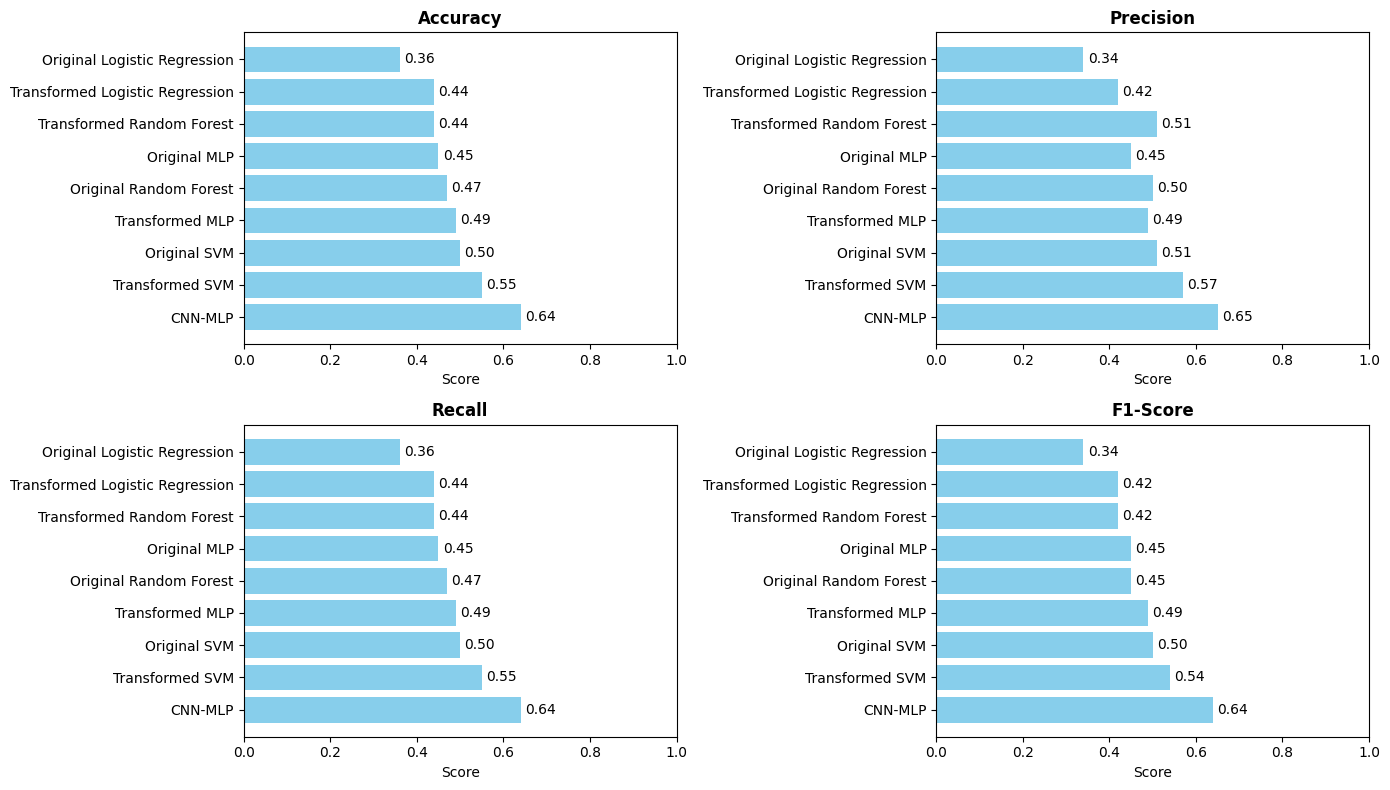

In [ ]:
# Vẽ bar plot 2x2
fig, axes = plt.subplots(2, 2, figsize=(14, 8))

# Chỉ số các metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']

# Vẽ từng bar plot cho các metrics
for i in range(2):  # Duyệt qua hàng
    for j in range(2):  # Duyệt qua cột
        metric = metrics[i * 2 + j]  # Lấy metric tương ứng
        axes[i, j].barh(results_df.index, results_df[metric], color='skyblue')  # Bar plot nằm ngang, màu xanh
        axes[i, j].set_title(metric, fontweight='bold')
        axes[i, j].set_xlim(0, 1)  # Đặt giới hạn trục x từ 0 đến 1
        axes[i, j].set_xlabel('Score')

        # Hiển thị giá trị ở cuối mỗi thanh bar
        for index, value in enumerate(results_df[metric]):
            axes[i, j].text(value + 0.01, index, f'{value:.2f}', va='center')

plt.tight_layout()
plt.show()

**CONCLUSION**
- As we can see, the model consistently shows higher performance when applied to transformed data compared to original data. This effect is due to dimensionality reduction (PCA and HOG), which reduces memory and time consumption while retaining key data components.
- The CNN_MLP model demonstrates the best performance as expected in large datasets.
- Following that is the SVM model.

### Best model

EVALUATE OF MODEL: CNN-MLP BEST MODEL
Accuracy: 0.64
Precision: 0.65
Recall: 0.64
F1-score: 0.64
Classification report:
               precision    recall  f1-score   support

       Angry       0.57      0.56      0.56       985
     Disgust       0.73      0.58      0.64       102
        Fear       0.55      0.46      0.50      1043
       Happy       0.83      0.83      0.83      1765
         Sad       0.53      0.51      0.52      1210
    Surprise       0.81      0.73      0.76       795
     Neutral       0.54      0.68      0.60      1278

    accuracy                           0.64      7178
   macro avg       0.65      0.62      0.63      7178
weighted avg       0.65      0.64      0.64      7178



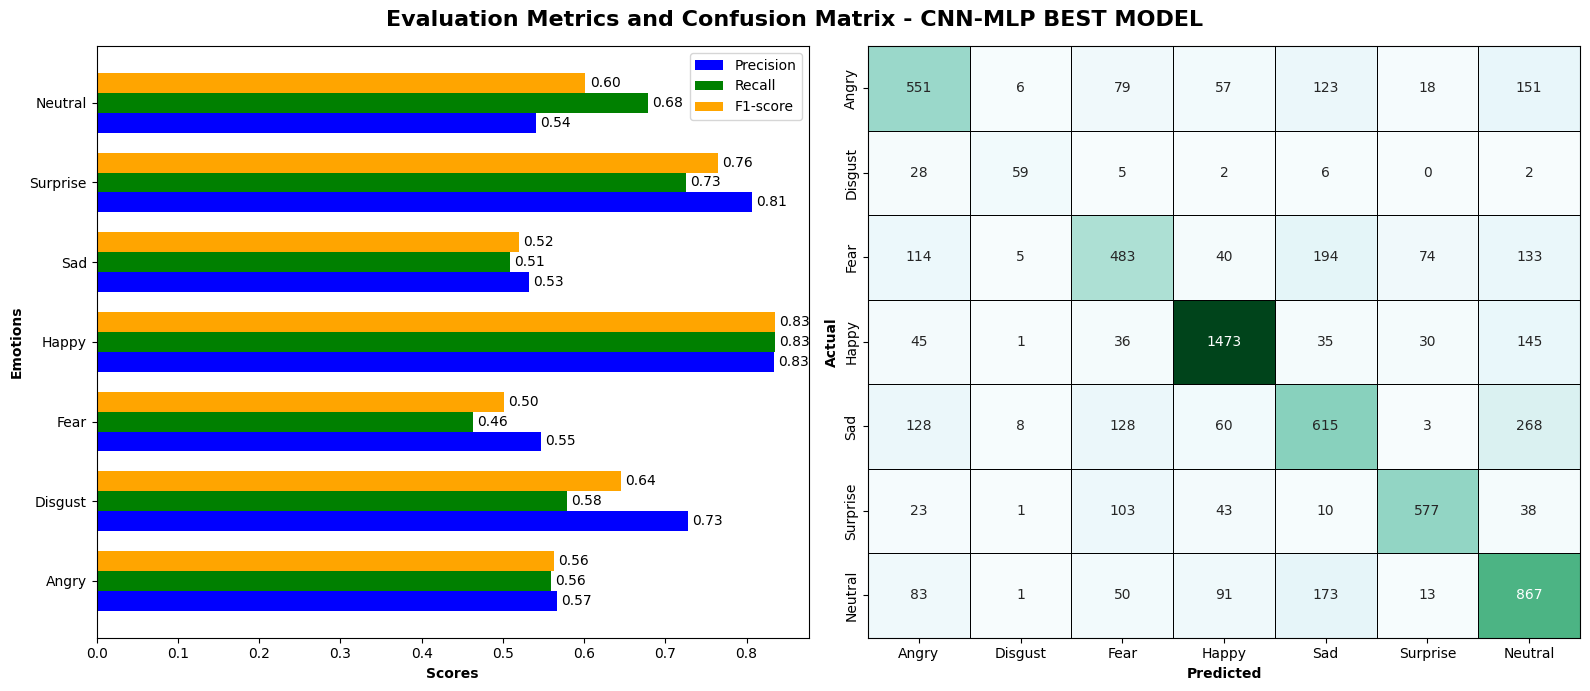

In [ ]:
_ = evaluate(y_test,y_pred_cnn,model_name = "CNN-MLP BEST MODEL",is_visualize=True)

**Emotion Category Analysis**

- Most Accurate (Highest Precision and Recall):

  + Happy: Precision (0.83), Recall (0.83), F1-score (0.83)
  + Surprise: Precision (0.81), Recall (0.73), F1-score (0.76)
- Most Errors (Lowest Precision and Recall):

  + Fear: Precision (0.55), Recall (0.46), F1-score (0.50)
  + Disgust: Precision (0.73), Recall (0.58), F1-score (0.64) - although better than Fear, still relatively lower in recall.

- Happy and Surprise categories are the easiest for the CNN-MLP model to predict accurately, likely due to distinct and consistent patterns in data for these emotions.
- Fear and Disgust are the most challenging, possibly due to their subtle and overlapping expressions, making them harder to distinguish.

**Winner Model: CNN-MLP with 64% accuracy**